In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
from sklearn.metrics import f1_score
# Package to implement ML Algorithms
import sklearn
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import RandomForestClassifier
# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor
from sklearn.metrics import accuracy_score
# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from pprint import pprint

In [2]:
df = pd.read_csv('shoppers.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

In [3]:
X = df.drop(columns = ['Revenue'])
y = df['Revenue']

In [5]:
X_encoded = pd.get_dummies(X, columns=['OperatingSystems','Browser','Region','TrafficType','VisitorType', 'Weekend','Month'])
X_encoded = X_encoded.astype(int)
X_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,64,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,2,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,10,627,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
X_encoded['Weekend_True'].value_counts()

Weekend_True
False    9462
True     2868
Name: count, dtype: int64

In [6]:
avg = X_encoded.mean()
avg

Administrative              2.315166
Administrative_Duration    80.654339
Informational               0.503569
Informational_Duration     34.425223
ProductRelated             31.731468
                             ...    
Month_Mar                   0.154663
Month_May                   0.272830
Month_Nov                   0.243147
Month_Oct                   0.044526
Month_Sep                   0.036334
Length: 75, dtype: float64

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [8]:
dtc = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
dtc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

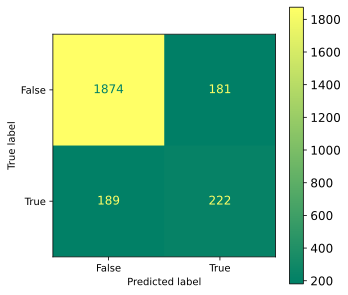

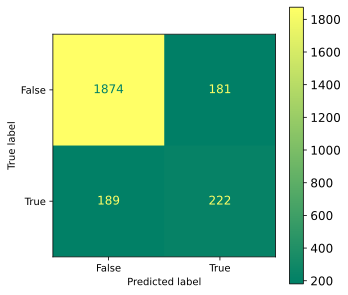

In [9]:
# Predictions on test set
y_predDT = dtc.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_predDT, labels = dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'summer', ax = ax);
fig

In [10]:
report = classification_report(test_y, y_predDT, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('P_DT_CR.csv')

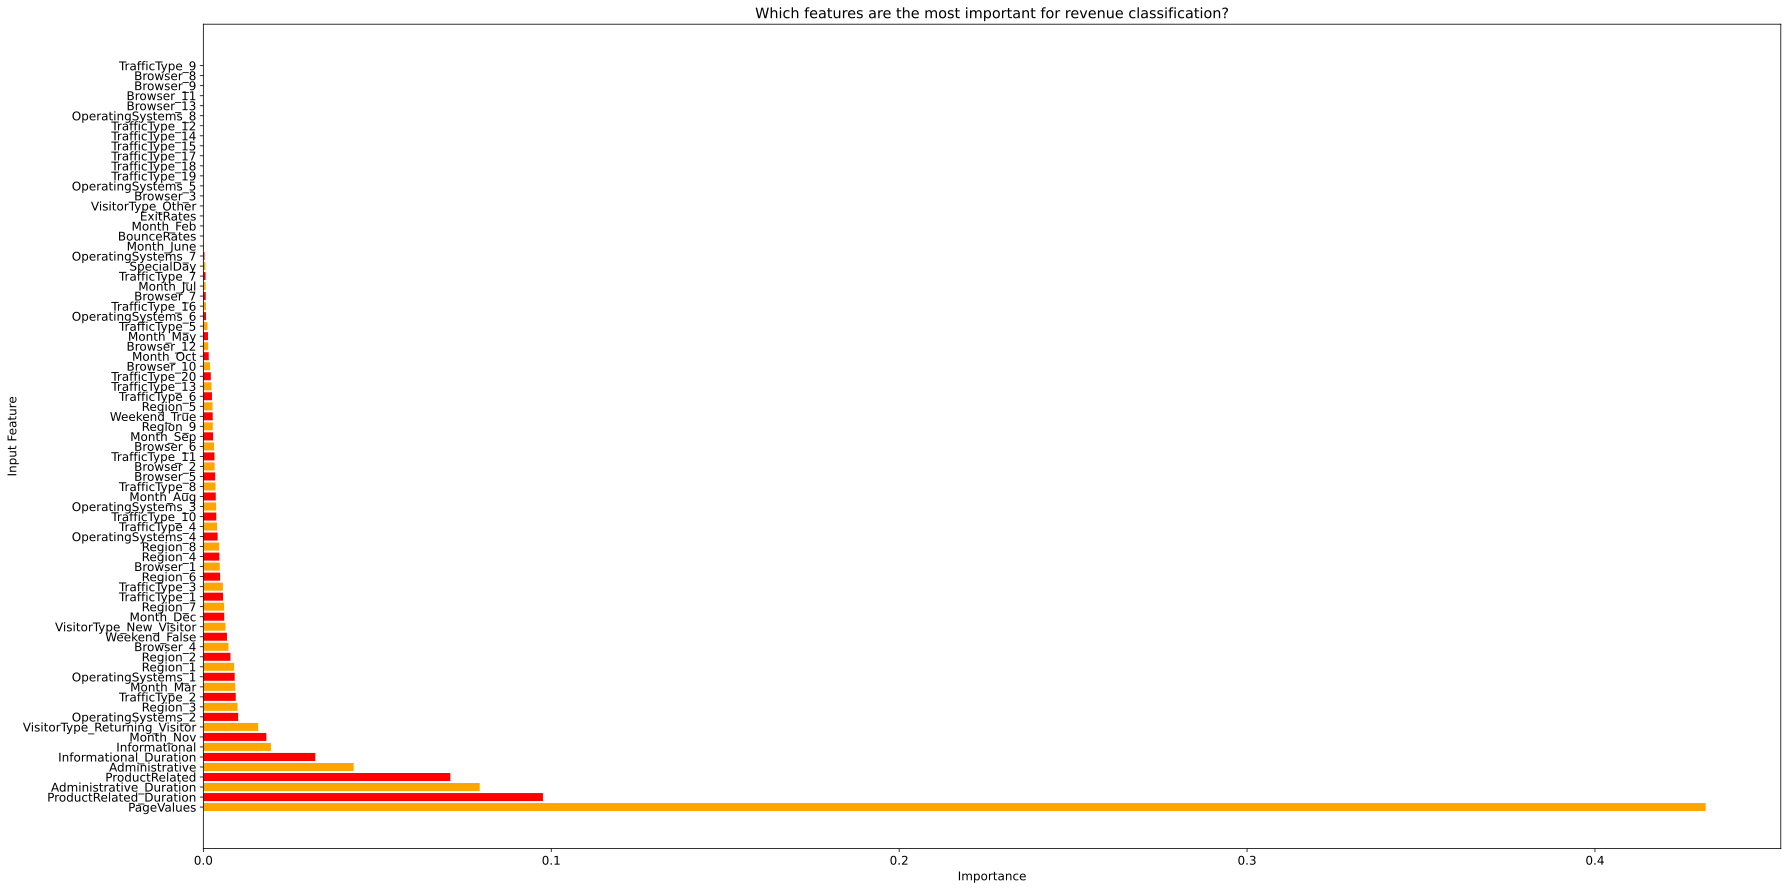

In [12]:
# Storing importance values from the trained model
importance2 = dtc.feature_importances_

# Storing feature importance as a dataframe
feature_imp2 = pd.DataFrame(list(zip(train_X.columns, importance2)),
               columns = ['Feature', 'Importance'])

feature_imp2 = feature_imp2.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(25, 12.5))
plt.barh(feature_imp2['Feature'], feature_imp2['Importance'], color = ['orange', 'red'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for revenue classification?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

In [13]:
# Creating the file where we want to write the model
P_pickle = open('dtc_shoppers.pickle', 'wb') 

# Write RF model to the file
pickle.dump(dtc, P_pickle) 

# Close the file
P_pickle.close()